<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Deep Learning</center>

# Challenge S5: Reconocimiento de objetos con CIFAR-10

## Objetivos

El objetivo de este challenge es aprender a resolver el problema de reconocimiento de imágenes utilizando redes neuronales implementadas con Keras.


## Tareas

Vamos a comenzar configurando el entorno, cargando y normalizando los datos de entrada, y creando un primer modelo, sobre el que luego aplicaremos la técnica del Dropout, y analizaremos su rendimiento.

### Configurando el entorno

Como siempre, comenzamos importando los módulos y librerías que vamos a necesitar, además, vamos a fijar una semilla para que las inicializaciones aleatorias sean igual aunque lo ejecutemos varias veces, y así los experimentos siempre salgan igual y poder encontrar fallos más fácilmente.

A continuación, podemos añadir todas las librerías que necesitemos:


In [1]:
############## Si al ejecutar el Kernel se bloquea, 
############## utiliza estas líneas para permitir la 
############## duplicación de librerías
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
##############

import numpy as np
from keras.datasets import cifar10
np.random.seed(123)  # for reproducibility
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten




Using TensorFlow backend.


### Cargar y normalizar los datos de entrada: CIFAR-10

Como hemos visto en el worksheet, podemos cargar los datos de la base de datos CIFAR-10 y normalizarlos al rango [0,1] para prepararlos para nuestra red.

A continuación, incluya el código necesario:

In [0]:
# Loading the CIFAR-10 datasets
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images  /= 255
test_images /= 255

In [3]:
train_images.shape

(50000, 32, 32, 3)

### Modelo 1 (sin dropout)

#### Definición del modelo

Para resolver este problema vamos a comenzar con una estructura un poco más profunda que las vistas hasta ahora. Debemos completar la celda a continuación para declarar el siguiente modelo:

- Capa de entrada convolucional, 32 filtros de tamaño 3x3 con función de activación relu (recordar que en la capa de entrada hay que especificar el tamaño de entrada)
- Capa convolucional, 32 filtros de tamaño 3x3, con función de activación relu
- Capa Max Pooling de tamaño 2x2
- Capa convolucional, 64 filtros de tamaño 3x3, con función de activación relu
- Capa convolucional, 64 filtros de tamaño 3x3, con función de activación relu
- Capa Max Pooling de tamaño 2x2
- Capa flatten
- Capa feed-forward (Dense en Keras) con 512 neuronas y función de activación relu
- Capa de salida feed-forward (Dense en Keras) con función de activación softmax

Para resolver este paso sería interesante fijarse en la documentación de keras https://keras.io/layers/core/ 

Además, se puede comprobar el modelo creado con la función "summary": model.summary()

In [4]:
# Primeras 10000 imágenes, las utilizamos como validación
X_valid = train_images[:10000]
Y_valid = train_labels[:10000]

X_train = train_images[10000:]
Y_train = train_labels[10000:]

X_test = test_images
Y_test = test_labels

n_classes = len(np.unique(Y_train))

print(X_train.shape)

# Reshape input to [width, height, #channels]
width, height, channels = X_train.shape[1:]
X_train = X_train.reshape(X_train.shape[0], width, height, channels)
X_valid = X_valid.reshape(X_valid.shape[0], width, height, channels)
X_test = X_test.reshape(X_test.shape[0], width, height, channels)

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_valid = np_utils.to_categorical(Y_valid, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(width, height, channels)))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

## 
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
##
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))


model.summary()

W0726 20:37:39.663861 140184921089920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 20:37:39.678427 140184921089920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 20:37:39.681026 140184921089920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 20:37:39.708291 140184921089920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



(40000, 32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0 

#### Compilando y entrenando el modelo

El siguiente paso que debemos hacer es compilar y entrenar el modelo.

En esta ocasión vamos a utilizar la función de coste 'categorical_crossentropy' y el optimizador adam. Además añadiremos, como habitualmente, la métrica 'accuracy' para visualizarla.

Puesto que no contamos con datos de validación definidos en el propio dataset, vamos a utilizar los datos de test como si fuesen validación.

Para entrenar el modelo, definimos el número de épocas (ejemplo, 100) y el tamaño del batch (ejemplo, 128). 

Si trabajamos con todo CIFAR-10 el entrenamiento va a ser muy lento, por lo que vamos a diezmar los datos (usar 500 datos de train y 100 de test) y a utilizar tan solo 10 épocas hasta estar 100% seguros de que todo está bien hecho. Al final de todo el challenge podemos volver a correr este mismo comando pero con los datos completos y con 100 épocas para alcanzar rendimientos mucho más competitivos.

Conviene guardar la salida de la función fit ('history'), para analizar posteriormente su rendimiento.

Escribir el código necesario para hacer esto en la celda siguiente:

In [5]:

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=128, epochs=10, 
          verbose=1, validation_data=[X_valid, Y_valid])

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

W0726 20:37:39.783051 140184921089920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0726 20:37:39.810992 140184921089920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0726 20:37:39.905476 140184921089920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0726 20:37:39.978183 140184921089920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 8s 203us/step - loss: 1.4889 - acc: 0.4591 - val_loss: 1.1546 - val_acc: 0.5796
Epoch 2/10
40000/40000 [==============================] - 5s 123us/step - loss: 1.0243 - acc: 0.6386 - val_loss: 0.9623 - val_acc: 0.6576
Epoch 3/10
40000/40000 [==============================] - 5s 123us/step - loss: 0.8174 - acc: 0.7154 - val_loss: 0.7920 - val_acc: 0.7226
Epoch 4/10
40000/40000 [==============================] - 5s 123us/step - loss: 0.6573 - acc: 0.7714 - val_loss: 0.7526 - val_acc: 0.7413
Epoch 5/10
40000/40000 [==============================] - 5s 122us/step - loss: 0.5175 - acc: 0.8194 - val_loss: 0.7414 - val_acc: 0.7432
Epoch 6/10
40000/40000 [==============================] - 5s 122us/step - loss: 0.3800 - acc: 0.8681 - val_loss: 0.8291 - val_acc: 0.7423
Epoch 7/10
40000/40000 [==============================] - 5s 123us/step - loss: 0.2439 - acc: 0.9162 - val_loss: 0.9181 - 

### Modelo 2 (con dropout)

#### Definición del modelo

Añade al modelo 1 tres capas dropout de la siguiente manera (sin variar el resto):

- Capa de entrada convolucional
- Capa convolucional
- Capa Max Pooling
- _Capa dropout de probabilidad 25%_
- Capa convolucional
- Capa convolucional
- Capa Max Pooling
- _Capa dropout de probabilidad 25%_
- Capa flatten
- Capa feed-forward (Dense en Keras) 
- _Capa dropout de probabilidad 40%_
- Capa de salida 

Para resolver este paso, se puede comprobar la documentación de Keras para la capa Dropout: https://keras.io/layers/core/ 

In [6]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(width, height, channels)))
model2.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model2.add(Dropout(0.25))

##
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(n_classes, activation='softmax'))


model2.summary()


W0726 20:38:33.574913 140184921089920 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
__________

#### Compilando y entrenando el modelo

Repetir ahora los pasos de compilación y entrenamiento anteriores con el nuevo modelo. 

NOTA: Guardar el historial del entrenamiento en una variable 'history2' para evaluar su rendimiento y compararlo con el anterior.

In [7]:

model2.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history2 = model2.fit(X_train, Y_train, batch_size=128, epochs=10, 
          verbose=1, validation_data=[X_valid, Y_valid])

score2 = model2.evaluate(X_test, Y_test, verbose=0)
print(score2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 6s 146us/step - loss: 1.6029 - acc: 0.4127 - val_loss: 1.2669 - val_acc: 0.5289
Epoch 2/10
40000/40000 [==============================] - 5s 130us/step - loss: 1.1789 - acc: 0.5770 - val_loss: 1.0584 - val_acc: 0.6135
Epoch 3/10
40000/40000 [==============================] - 5s 130us/step - loss: 0.9945 - acc: 0.6468 - val_loss: 0.8744 - val_acc: 0.6906
Epoch 4/10
40000/40000 [==============================] - 5s 130us/step - loss: 0.8719 - acc: 0.6948 - val_loss: 0.7933 - val_acc: 0.7159
Epoch 5/10
40000/40000 [==============================] - 5s 130us/step - loss: 0.7901 - acc: 0.7233 - val_loss: 0.7443 - val_acc: 0.7327
Epoch 6/10
40000/40000 [==============================] - 5s 129us/step - loss: 0.7192 - acc: 0.7484 - val_loss: 0.7036 - val_acc: 0.7481
Epoch 7/10
40000/40000 [==============================] - 5s 129us/step - loss: 0.6578 - acc: 0.7669 - val_loss: 0.7032 - 


### Comparación de rendimientos

#### Rendimiento modelo 1 (sin dropout)

Utilizando el material de la sesión anterior, a continuación, pinte las curvas de rendimiento (train y test) del modelo 1 sin dropout.

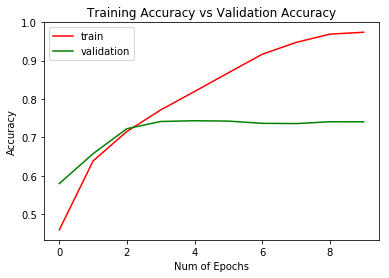

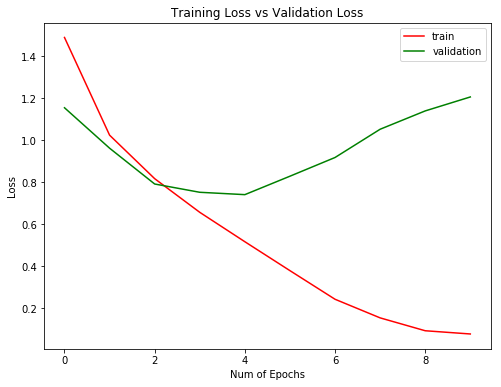

In [8]:
############## Si al ejecutar el Kernel se bloquea, 
############## utiliza estas líneas para permitir la 
############## duplicación de librerías
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
##############

import matplotlib.pyplot as plt


#aqui las graficas anteriores de un challenge anterior

import matplotlib.pyplot as plt

def plotCurves(history,epochs):

    plt.figure(0)
    plt.plot(history.history['acc'],'r')
    plt.plot(history.history['val_acc'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
 
 
    plt.figure(1)
    plt.plot(history.history['loss'],'r')
    plt.plot(history.history['val_loss'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
 
 
    plt.show()
    
plotCurves(history,10)

¿Te parecen buenas curvas de aprendizaje?

El efecto que se muestra, ¿tiene algún nombre? ¿A qué cosas suele deberse? En nuestro caso, ¿a qué se debe?

El efecto que se muestra es overfitting ya que la función de coste para entrenamiento es muy buena mientras que la de validación tiende a aumentar el coste. Esto se debe a que hemos sobreentrenado la red con muchas epochs.


#### Rendimiento modelo 2 (con dropout)

Repita el análisis para el modelo 2 (con dropout).

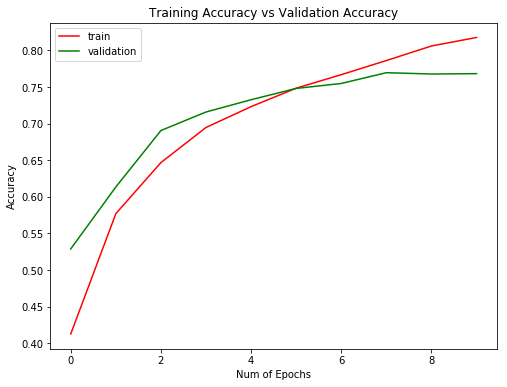

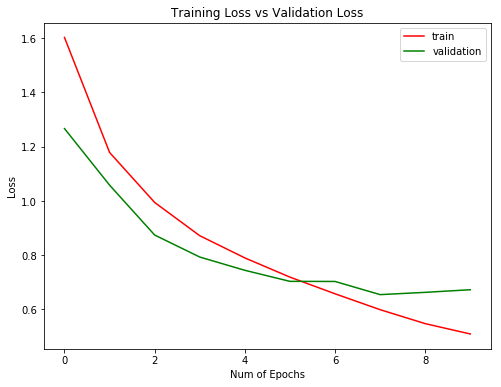

In [9]:
plotCurves(history2,10)

Analiza ahora las curvas para el segundo modelo. ¿Te parecen mejores las curvas ahora? 

Se observa que las curvas para el segundo modelo son mucho mejores ya que la función de coste disminuye tanto para entrenamiento como para validación. Esto se debe a las capas de dropout, que ayudan a la generalización y a eliminar overfitting.

### Aumento de los datos de entrenamiento

A continuación, añadid lo que sea necesario para volver a realizar el entrenamiento con 10 veces más datos, y analizar su rendimiento.

Ejecutar la celda y contestar a las preguntas que se muestran:

In [10]:
# Primeras 10000 imágenes, las utilizamos como validación
X_valid = train_images[:25000]
Y_valid = train_labels[:25000]

X_train = train_images[25000:]
Y_train = train_labels[25000:]

X_test = test_images
Y_test = test_labels

n_classes = len(np.unique(Y_train))

print(X_train.shape)

# Reshape input to [width, height, #channels]
width, height, channels = X_train.shape[1:]
X_train = X_train.reshape(X_train.shape[0], width, height, channels)
X_valid = X_valid.reshape(X_valid.shape[0], width, height, channels)
X_test = X_test.reshape(X_test.shape[0], width, height, channels)

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_valid = np_utils.to_categorical(Y_valid, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(width, height, channels))) 
model3.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model3.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
##
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dense(n_classes, activation='softmax'))


model3.summary()

model3.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history3 = model3.fit(X_train, Y_train, batch_size=128, epochs=10, 
                          verbose=1, validation_data=[X_test, Y_test])

score3 = model3.evaluate(X_test, Y_test, verbose=1)
print(score3)

(25000, 32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0 

¿Han mejorado las curvas de aprendizaje? ¿A qué se debe?

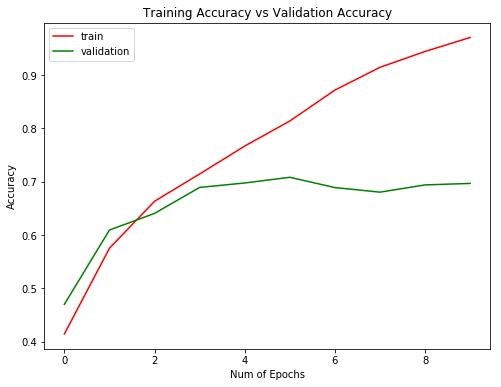

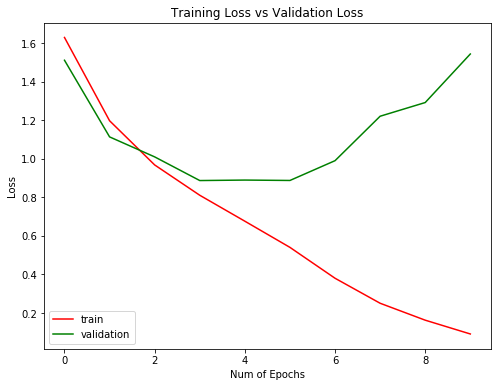

In [11]:
plotCurves(history3,10)

Como se puede observar, las curvas en este caso no han mejorado, volvemos a tener overfitting. Esto se debe al aumento de los datos de entrada.


### Opcional: Entrenamiento con todos los datos

Repetir el paso anterior utilizando todos los datos, e incluso aumentando el número de épocas (20-100). El entrenamiento será muy lento por lo que esto tendremos que lanzarlo y dejarlo corriendo.

Obtener las curvas de aprendizaje y comentar si han mejorado o si aún deberíamos haber aumentado más el número de épocas o los datos.

In [12]:
X_train = train_images
Y_train = train_labels

X_test = test_images
Y_test = test_labels

n_classes = len(np.unique(Y_train))

# Reshape input to [width, height, #channels]
width,height,channels = X_train.shape[1:]
X_train = X_train.reshape(X_train.shape[0], width, height, channels)
X_valid = X_valid.reshape(X_valid.shape[0], width, height, channels)
X_test = X_test.reshape(X_test.shape[0], width, height, channels)
input_shape = (width, height, channels)


# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_valid = np_utils.to_categorical(Y_valid, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
model4.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model4.add(Dropout(0.25))


model4.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model4.add(Dropout(0.25))


model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(n_classes, activation='softmax'))

model4.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [13]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history4 = model4.fit(X_train, Y_train, batch_size=128, epochs=100, 
          verbose=1, validation_data=[X_test, Y_test])

score4 = model4.evaluate(X_test, Y_test, verbose=1)
print(score4)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.6234 - acc: 0.4081 - val_loss: 1.2222 - val_acc: 0.5579
Epoch 2/100
50000/50000 [==============================] - 6s 128us/step - loss: 1.1629 - acc: 0.5845 - val_loss: 0.9955 - val_acc: 0.6487
Epoch 3/100
50000/50000 [==============================] - 6s 128us/step - loss: 0.9524 - acc: 0.6633 - val_loss: 0.8404 - val_acc: 0.7078
Epoch 4/100
50000/50000 [==============================] - 6s 128us/step - loss: 0.8312 - acc: 0.7082 - val_loss: 0.8207 - val_acc: 0.7102
Epoch 5/100
50000/50000 [==============================] - 6s 129us/step - loss: 0.7537 - acc: 0.7341 - val_loss: 0.7456 - val_acc: 0.7390
Epoch 6/100
50000/50000 [==============================] - 6s 129us/step - loss: 0.6904 - acc: 0.7566 - val_loss: 0.7313 - val_acc: 0.7457
Epoch 7/100
50000/50000 [==============================] - 6s 128us/step - loss: 0.6375 - acc: 0.7762 - val_loss: 0.

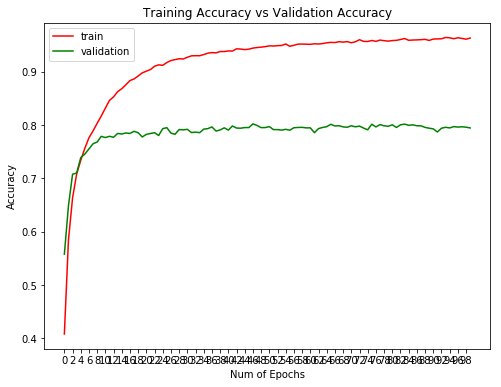

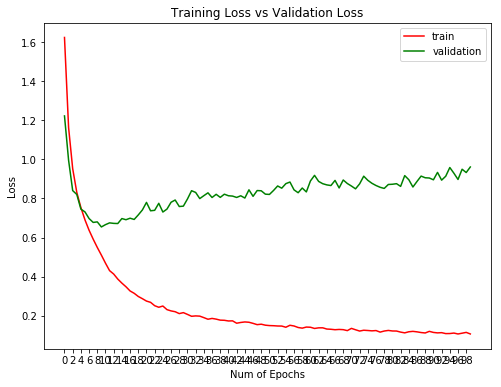

In [14]:
plotCurves(history4, 100)

Como podemos observar, volvemos a obtener overfitting al utilizar todos los datos de entrenamiento y a pesar de las capas de dropout. Quizás podríamos obtener mejores resultados cambiando el porcentaje de dropout de las capas añadidas.